In [1]:
from google.colab import drive
drive.mount('/content/drive/')
path= "/content/drive/MyDrive/APESTGTSTONK/assets/BTC-USD.csv"

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
prices= pd.read_csv(path,index_col=0)
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-07,587.770996,597.513000,586.815979,592.690002,592.690002,82398400.0
2016-08-08,592.736023,592.994019,588.046997,591.054016,591.054016,61194100.0
2016-08-09,591.038025,591.091003,584.793030,587.801025,587.801025,92228096.0
2016-08-10,587.648010,599.984009,586.370972,592.103027,592.103027,102905000.0
2016-08-11,592.124023,597.541992,589.119995,589.119995,589.119995,74514400.0


Technical Indicators

In [5]:
#14-day moving average (based on close prices)
prices['SMA14'] = prices.Close.rolling(window=14).mean()

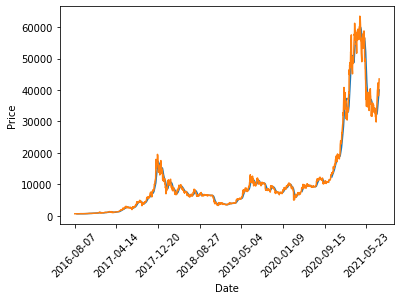

In [6]:
prices['SMA14'].plot(label='SMA 14 Day')
ax = prices['Close'].plot(label='BTCUSD')

ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.tick_params(axis='x',labelrotation=45) 
plt.show()

In [7]:
#RSI
def computeRSI(data,window):
  diff = data.diff(1).dropna()
  up_change = 0*diff
  down_change = 0*diff

  up_change[diff>0] = diff[diff>0]
  down_change[diff<0] = diff[diff<0]

  ema_up = up_change.ewm(com=window-1,min_periods=window).mean()
  ema_down = down_change.ewm(com=window-1,min_periods=window).mean()

  rs = abs(ema_up/ema_down)
  rsi = 100-(100/(1+rs))
  return rsi

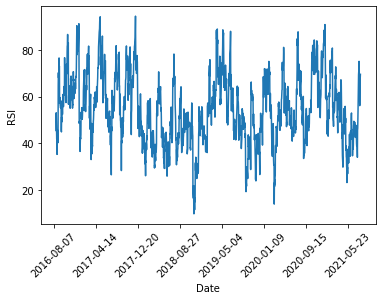

In [8]:
prices['RSI'] = computeRSI(prices['Close'],14)

ax = prices['RSI'].plot(label='RSI')
ax.set_ylabel('RSI')
ax.set_xlabel('Date')
ax.tick_params(axis='x',labelrotation=45) 
plt.show()

In [9]:
#On Balance Volume
prices['On Balance Volume'] = (np.sign(prices.Close.diff())*prices.Volume).fillna(0).cumsum()

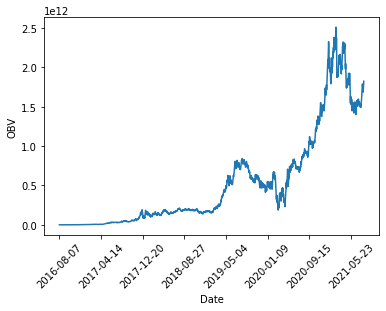

In [10]:
ax = prices['On Balance Volume'].plot(label='OBV')
ax.set_ylabel('OBV')
ax.set_xlabel('Date')
ax.tick_params(axis='x',labelrotation=45) 
plt.show()

In [10]:
prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA14,RSI,On Balance Volume
1822,2021-08-03,39178.402344,39750.031250,37782.050781,38152.980469,38152.980469,2.618983e+10,37542.024972,56.102804,1.684563e+12
1823,2021-08-04,38213.332031,39952.296875,37589.164063,39747.503906,39747.503906,2.537256e+10,38087.511440,60.725340,1.709936e+12
1824,2021-08-05,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,3.518503e+10,38698.686384,63.627882,1.745121e+12
1825,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10,39358.325614,68.041353,1.783347e+12
1826,2021-08-07,42783.437500,43901.675781,42684.074219,43515.773438,43515.773438,4.021595e+10,40017.134766,69.474065,1.823563e+12


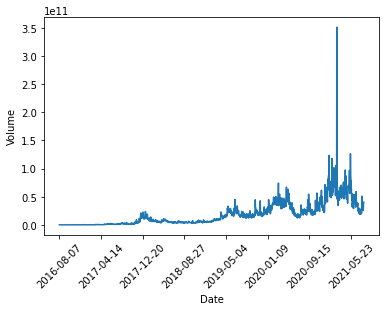

In [11]:
ax = prices['Volume'].plot(label='OBV')
ax.set_ylabel('Volume')
ax.set_xlabel('Date')
ax.tick_params(axis='x',labelrotation=45) 
plt.show()

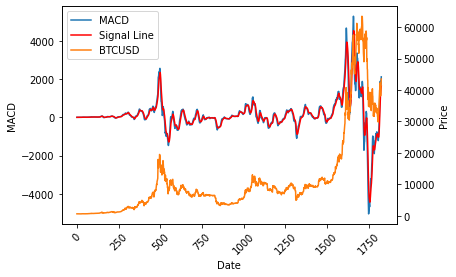

In [11]:
#MACD
ema1 = prices.Close.ewm(span=12,adjust=False).mean()
ema2 = prices.Close.ewm(span=26,adjust=False).mean()
macd = ema1-ema2
signal = macd.ewm(span=9,adjust=False).mean()
  
macd.plot(label='MACD')
ax = signal.plot(label='Signal Line', color='r')
prices.Close.plot(ax=ax,secondary_y=True,label='BTCUSD')

ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines,[i.get_label() for i in lines],loc='upper left')
ax.tick_params(axis='x',labelrotation=45)
plt.show()
  

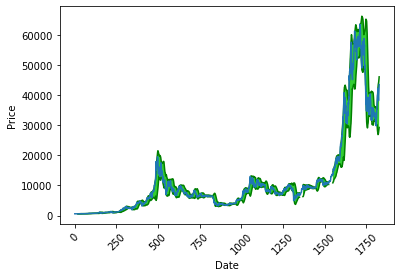

In [12]:
#Bollinger Bands
ema20 = prices.Close.rolling(window=20).mean()
std20 = prices.Close.rolling(window=20).std()

upper_band = ema20 + std20*2
lower_band = ema20 - std20*2

upper_band.plot(label='Upper',color = 'g')
lower_band.plot(label='Lower',color = 'g')
ax = prices['Close'].plot(label='BTCUSD')

ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.tick_params(axis='x',labelrotation=45) 
ax.fill_between(prices.index,upper_band,lower_band,facecolor='limegreen')
plt.show()

In [13]:
prices.to_csv("/content/drive/MyDrive/APESTGTSTONK/assets/BTC_USD_withTechIndicators.csv")

ARIMA time series prediciton

<function matplotlib.pyplot.show>

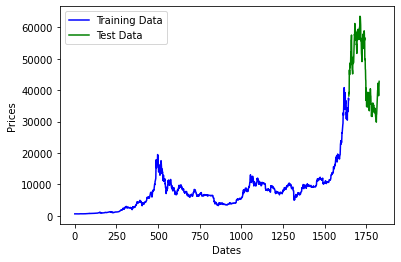

In [ ]:
train_pct = 0.9
train_data,test_data = prices[0:int(len(prices)*train_pct)],prices[int(len(prices)*train_pct):]
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Open'],'blue',label='Training Data')
plt.plot(test_data['Open'],'green',label='Test Data')
plt.legend()
plt.show

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
pred = list()
for i in range(len(test_ar)):
  model = ARIMA(history,order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  y_hat = output[0]
  pred.append(y_hat)
  obs = test_ar[i]
  history.append(obs)

error = mean_squared_error(test_ar,pred)
print('MSE %:', error)



LinAlgError: ignored

In [ ]:
#simple lin reg

from sklearn.model_selection import train_test_split

x = prices['SMA14']
y = prices['Open']

X = np.array(x).reshape(-1,1)
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

plt.plot(prices.Date,coef1[0]*x+bias1,color='red')
plt.plot(prices.Date,prices.Close,color='blue')
plt.show()

ValueError: ignored